In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# x data, shape=(200, 1)
x = np.linspace(-6, 6, 200)     

## Activation Functions

Consider a neuron:
$$\mathcal{Y = \sum(weight * input) + bias}$$

* In this case, the value of Y can be anything (-inf to inf).
* The neuron really doesn't know the bounds of the value, so how does the neuron know if it should fire or not?
* This is where activation functions come in
* Ideally, we would like gradated (i.e. analog) activation values, but it cannot be linear, because a constant gradient does not allow for learning through backpropagation.
* Also, if we have multiple layers, each activated by a linear activation, then the final activation function of the last layer is nothing more than a linear function of the input of the first layer.

### The Sigmoid Function
* Provides a "step-like" activation
* Combinations of the function are non-linear so we can stack layers.
* Allows for multiple classes and non-binary activations.
* Has a smooth gradient

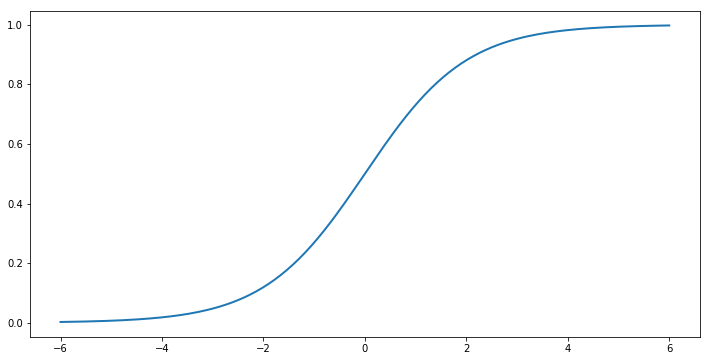

In [2]:
sess = tf.Session()
y_sigmoid = sess.run(tf.nn.sigmoid(x))
plt.figure(figsize=(12,6))
plt.plot(x,y_sigmoid,lw=2)
plt.show()
sess.close()

### So why doesn't every neural network use sigmoid?
* Notice that towards either end of the sigmoid function, the "responsiveness" grows small.
* If you keep multiplying small decimals by small decimals, the values get smaller and smaller, so the network stops learning!

### Nearly every convolutional network uses relu

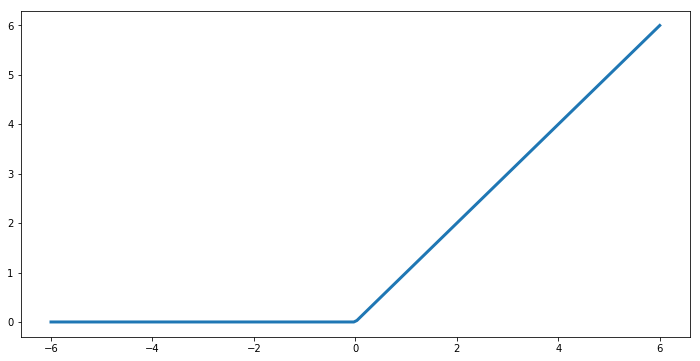

In [3]:
sess = tf.Session()
y_sigmoid = sess.run(tf.nn.relu(x))
plt.figure(figsize=(12,6))
plt.plot(x,y_sigmoid,lw=3)
plt.show()
sess.close()

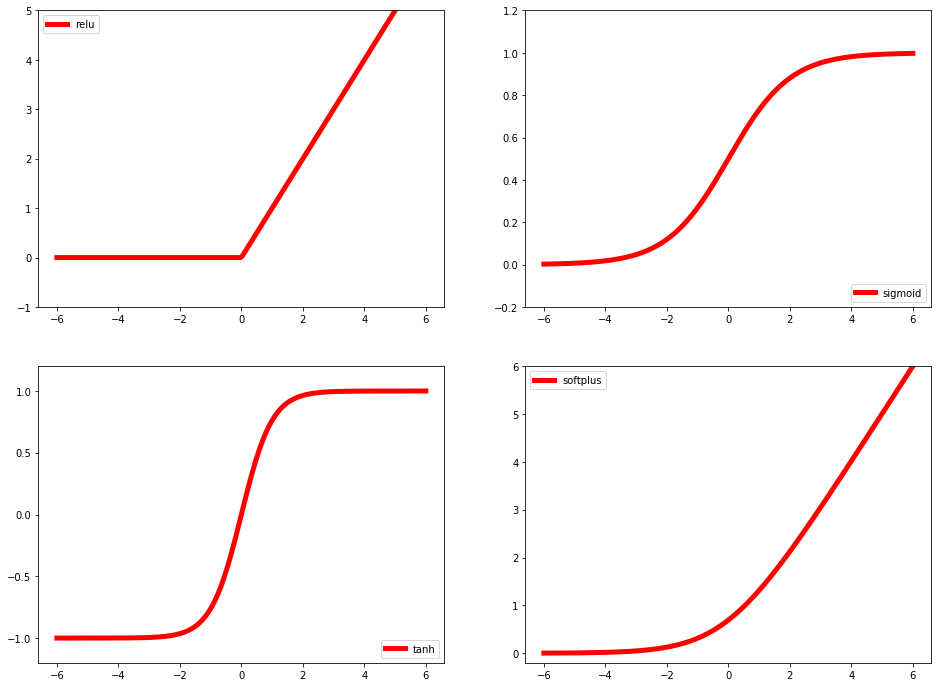

In [4]:
sess = tf.Session()
# following are popular activation functions
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)

y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

# plt to visualize these activation function
plt.figure(1, figsize=(16, 12))
plt.subplot(221)
plt.plot(x, y_relu, c='red', lw=5, label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, c='red', lw=5, label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='lower right')

plt.subplot(223)
plt.plot(x, y_tanh, c='red', lw=5, label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='lower right')

plt.subplot(224)
plt.plot(x, y_softplus, c='red', lw=5, label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()
sess.close()

### Of course you can make your own activation functions as well

In [5]:
def leaky_relu(x, alpha=0.2, name="leaky_relu"):
    if not (0 < alpha <= 1):
        raise ValueError("`alpha` value must be in [0, 1]`")

    with tf.name_scope(name, "leaky_relu") as name_scope:
        x = tf.convert_to_tensor(x, name="features")
        return tf.maximum(x, alpha * x, name=name_scope)
    
def swish(x, name='swish'):
    """Swish function.
    See `Swish: a Self-Gated Activation Function <https://arxiv.org/abs/1710.05941>`__.
    """
    with tf.name_scope(name, "swish") as name_scope:
        x = tf.nn.sigmoid(x) * x
    return x

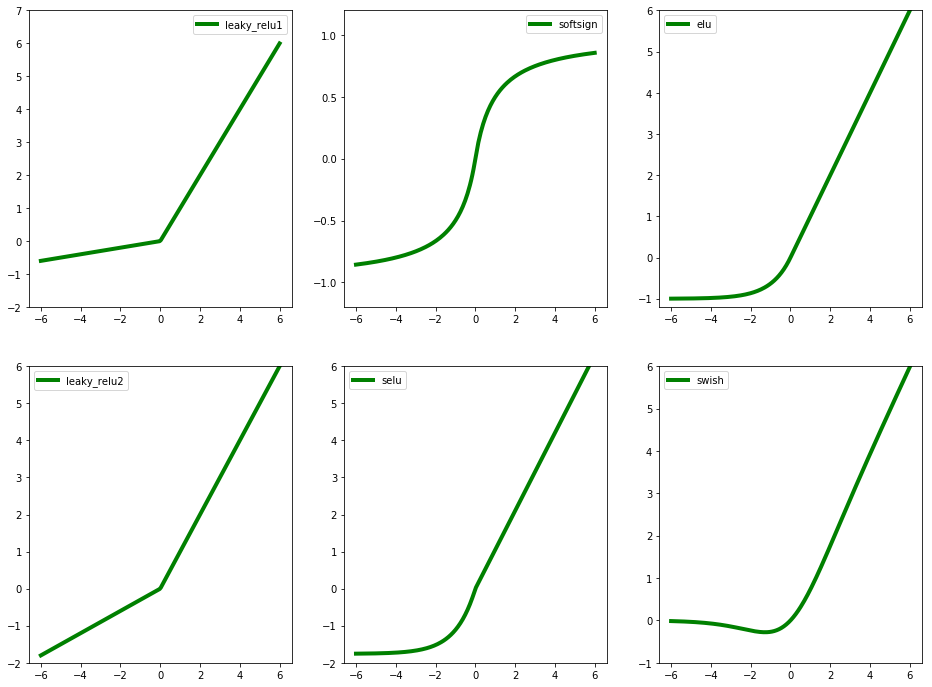

In [7]:
sess = tf.Session()
# following are popular activation functions
y_leaky_relu1 = leaky_relu(x,alpha=0.1)
y_leaky_relu2 = leaky_relu(x,alpha=0.3)
y_softsign = tf.nn.softsign(x)
y_elu = tf.nn.elu(x)
y_selu = tf.nn.selu(x)
y_swish = swish(x)

y_leaky_relu1, y_leaky_relu2, y_softsign, y_elu, y_selu, y_swish = \
sess.run([y_leaky_relu1, y_leaky_relu2, y_softsign, y_elu,
          y_selu,y_swish])

# plt to visualize these activation function
plt.figure(1, figsize=(16, 12))
plt.subplot(231)
plt.plot(x, y_leaky_relu1, c='green', lw=4, label='leaky_relu1')
plt.ylim((-2, 7))
plt.legend(loc='best')

plt.subplot(232)
plt.plot(x, y_softsign, c='green', lw=4, label='softsign')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(233)
plt.plot(x, y_elu, c='green', lw=4, label='elu')
plt.ylim((-1.2, 6))
plt.legend(loc='best')

plt.subplot(234)
plt.plot(x, y_leaky_relu2, c='green', lw=4, label='leaky_relu2')
plt.ylim((-2, 6))
plt.legend(loc='best')

plt.subplot(235)
plt.plot(x, y_selu, c='green', lw=4, label='selu')
plt.ylim((-2, 6))
plt.legend(loc='best')

plt.subplot(236)
plt.plot(x, y_swish, c='green', lw=4, label='swish')
plt.ylim((-1, 6))
plt.legend(loc='best')

plt.show()
sess.close()